<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [3]:
import numpy as np
import pandas as pd
from pandas import Series as sr
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the health insurance dataset and check the first five observations

In [4]:
df1=pd.read_csv('health_insurance.csv')
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
q1=df1['bmi'].quantile(0.25)
q2=df1['bmi'].quantile(0.50)
q3=df1['bmi'].quantile(0.75)

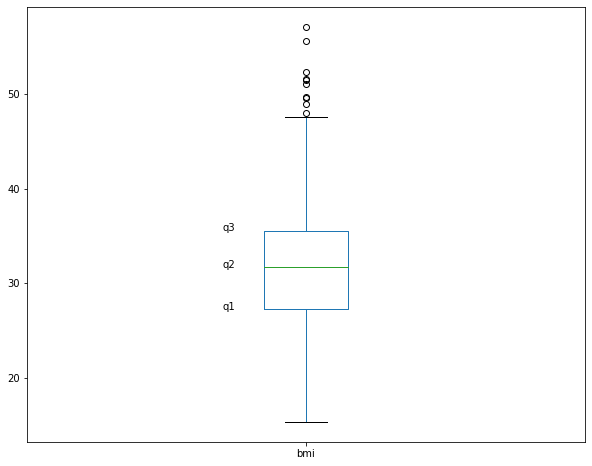

In [6]:
plt.figure(figsize=(10,8))
df1['bmi'].plot(kind='box')
plt.text(x=0.85,y=q1,s='q1')
plt.text(x=0.85,y=q2,s='q2')
plt.text(x=0.85,y=q3,s='q3')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\sai\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


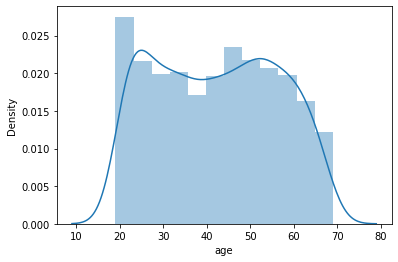

In [7]:
sns.distplot(df1['age'])
plt.show()

In [8]:
df1['age'].skew()

0.04359793424360781

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\sai\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


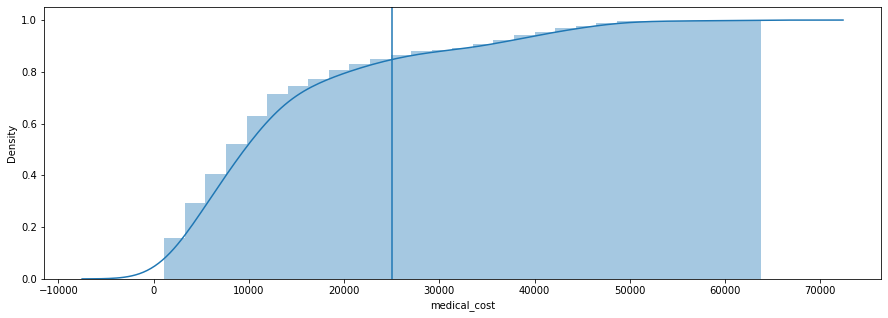

In [9]:
plt.figure(figsize=(15,5))
sns.distplot(df1['medical_cost'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.axvline(25000)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

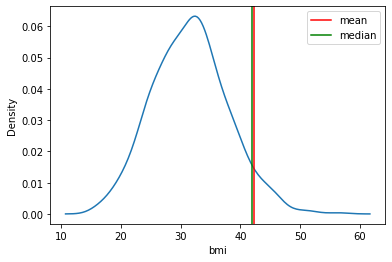

In [10]:
a=df1['age'].mean()
b=df1['age'].median()
sns.kdeplot(x=df1['bmi'])
plt.axvline(a,color='r',label='mean')
plt.axvline(b,color='g',label='median')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

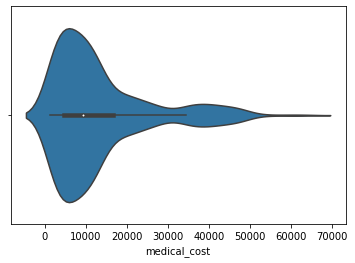

In [11]:
sns.violinplot(x=df1['medical_cost'])
plt.show()

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df1[(df1['age']<30) &(df1['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


In [13]:
a=df1['medical_cost']>40000
a.value_counts()

False    1222
True       78
Name: medical_cost, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

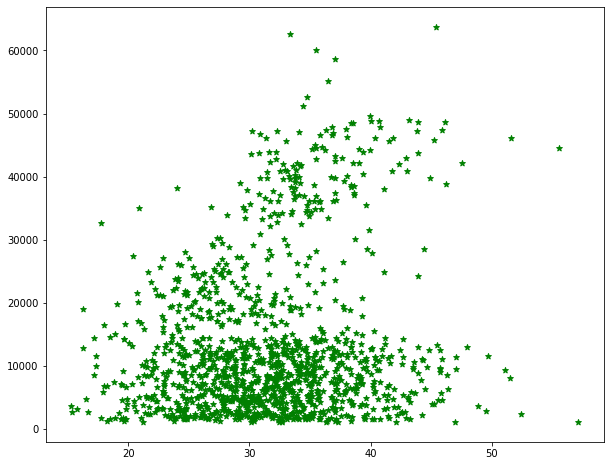

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(df1['bmi'],df1['medical_cost'],color='green',marker='*')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df1['bmi'].groupby(df1['gender']).std()/(df1['bmi'].mean())*100

gender
F    20.275855
M    19.959118
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

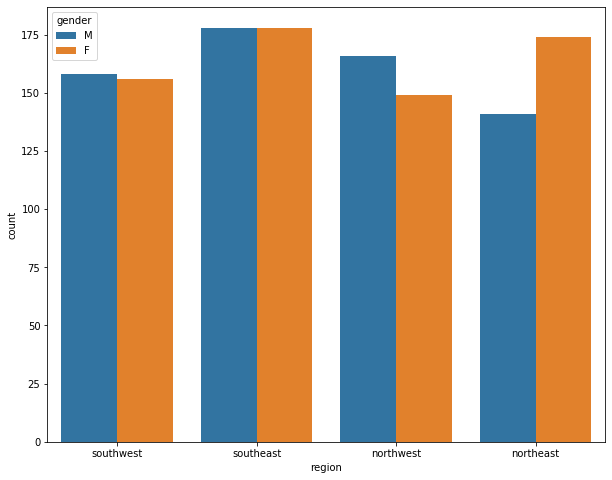

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=df1,x='region',hue='gender')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

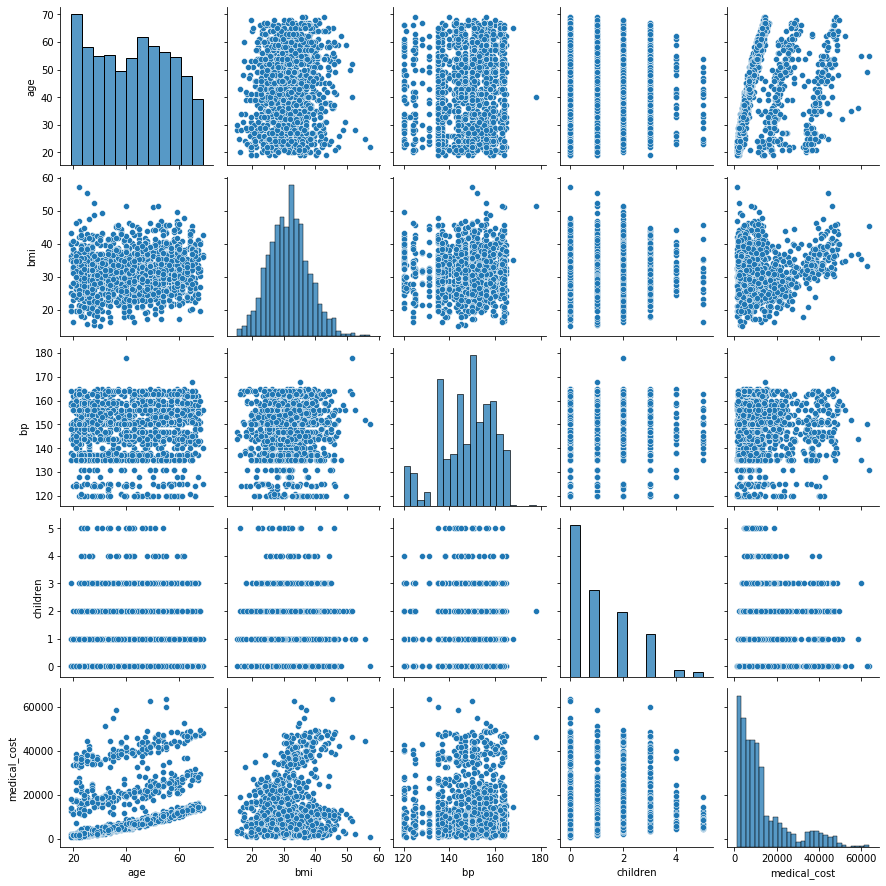

In [17]:
sns.pairplot(data=df1)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\sai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


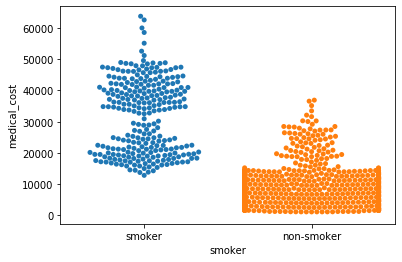

In [18]:
sns.swarmplot(x = 'smoker',  y= 'medical_cost', data = df1)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

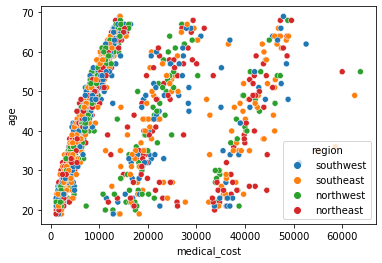

In [20]:
sns.scatterplot(x=df1['medical_cost'],y=df1['age'],hue=df1['region'])
plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
pd.get_dummies(df1['region']).head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['smoker_label']=le.fit_transform(df1['smoker'])
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
freq=df1['gender'].value_counts(normalize=True)

In [24]:
df1['gender_freq']=df1['gender'].map(freq)

In [25]:
df1.tail()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq
1295,54,F,30.97,143,3,southwest,non-smoker,10600.5483,0,0.505385
1296,22,M,34.92,156,0,northeast,non-smoker,2205.9808,0,0.494615
1297,21,M,34.85,145,0,southeast,non-smoker,1629.8335,0,0.494615
1298,22,M,24.80,150,0,northwest,non-smoker,2007.9450,0,0.494615
1299,63,M,33.07,159,0,northwest,smoker,29141.3603,1,0.494615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
df_map={'smoker':0,'non-smoker':1}
df1['smoker_variable']=df1['smoker'].map(df_map)
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,smoker_variable
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,0
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,1
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,1
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,1
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,1


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
m=df1['bmi'].mean()

In [28]:
stde=df1['bmi'].std()

In [29]:
zscre=(df1['bmi']-m)/stde

In [30]:
zscre

0       0.050123
1       0.816269
2       0.537813
3      -1.239111
4      -0.582302
          ...   
1295   -0.096185
1296    0.525228
1297    0.514215
1298   -1.066847
1299    0.234187
Name: bmi, Length: 1300, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
range_age=df1['age'].max()-df1['age'].min()

In [32]:
range_age

50

In [33]:
agemin=df1['age'].min()

In [34]:
agemax=df1['age'].max()

In [35]:
df1['agenormal']=(df1['age']-agemin)/(agemax-agemin)

In [36]:
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,smoker_variable,agenormal
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,0,0.08
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,1,0.02
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,1,0.28
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,1,0.36
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,1,0.34


In [37]:
range_age1=df1['agenormal'].max()-df1['agenormal'].min()

In [38]:
range_age1

1.0

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df1['medical_cost'].skew()

1.5341854555059413

In [40]:
df1['log_medical_cost']=np.log(df1['medical_cost'])

In [41]:
s=np.sqrt(df1['medical_cost'].skew())
s

1.2386224023107046

In [42]:
df1

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,smoker_variable,agenormal,log_medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,0,0.08,9.734176
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,1,0.02,7.453302
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,1,0.28,8.400538
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,1,0.36,9.998092
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,1,0.34,8.260197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385,1,0.70,9.268661
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615,1,0.06,7.698927
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615,1,0.04,7.396233
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615,1,0.06,7.604867


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [43]:
df1['orig_medical_cost']=np.exp(df1['log_medical_cost'])

In [44]:
df1.tail()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,smoker_variable,agenormal,log_medical_cost,orig_medical_cost
1295,54,F,30.97,143,3,southwest,non-smoker,10600.5483,0,0.505385,1,0.70,9.268661,10600.5483
1296,22,M,34.92,156,0,northeast,non-smoker,2205.9808,0,0.494615,1,0.06,7.698927,2205.9808
1297,21,M,34.85,145,0,southeast,non-smoker,1629.8335,0,0.494615,1,0.04,7.396233,1629.8335
1298,22,M,24.80,150,0,northwest,non-smoker,2007.9450,0,0.494615,1,0.06,7.604867,2007.9450
1299,63,M,33.07,159,0,northwest,smoker,29141.3603,1,0.494615,0,0.88,10.279914,29141.3603


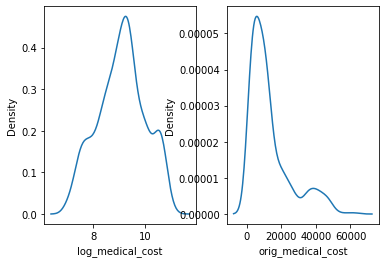

In [46]:
plt.subplot(1,2,1)
sns.kdeplot(df1['log_medical_cost'])
plt.subplot(1,2,2)
sns.kdeplot(df1['orig_medical_cost'])
plt.show()